In [57]:
from plotnine import *
import pandas as pd

gapminder=pd.read_table("gapminder.txt")

In [63]:
def SelectDataByCont(df,continents_list):
    """"select fata for continents given in the 'continents_list' from datafram 'df'"""
    dataSubset=df.loc[df['continent'].isin(continents_list),:]
    return dataSubset
def GetMeansByCategory(df,groupby_list):
    """"calculate the means of data from 'df' grouped by categories give in 'groupby_list'"""
    dataMeans=df.groupby(groupby_list, as_index=False).mean()
    return dataMeans
def MakeBarPlot(df):
    """"make a barplot with data from 'df'"""
    p= ggplot(df, aes(x = 'continent', y = 'gdpPercap', fill='continent')) +\
        geom_bar(stat='stat_identity', color="grey", show_legend=False) +\
        labs(
            x='Continent',
            y='GDP per capita',
            title='GDP per capita: a comparison'
            )
    return p

In [69]:
ToSelect=['Africa','Americas']
myNewData=SelectDataByCont(gapminder, ToSelect)
myNewData['continent'].unique()

array(['Africa', 'Americas'], dtype=object)

In [70]:
#define grouping variable as continent
groupBy=['continent']

#Various functions we can apply to each group, for example:
groupedData_means=myNewData.groupby('continent', as_index=False).mean()
groupedData_sums=myNewData.groupby('continent', as_index=False).sum()
groupedData_count=myNewData.groupby('continent', as_index=False).count()


#call GetMeansByCategory(df,groupby_list)
myNewData_meanPerCont=GetMeansByCategory(myNewData,groupBy)
myNewData_meanPerCont

,continent,year,lifeExp,pop,gdpPercap
0,Africa,1979.5,48.865330,9.916003e+06,2193.754578
1,Americas,1979.5,64.658737,2.450479e+07,7136.110356


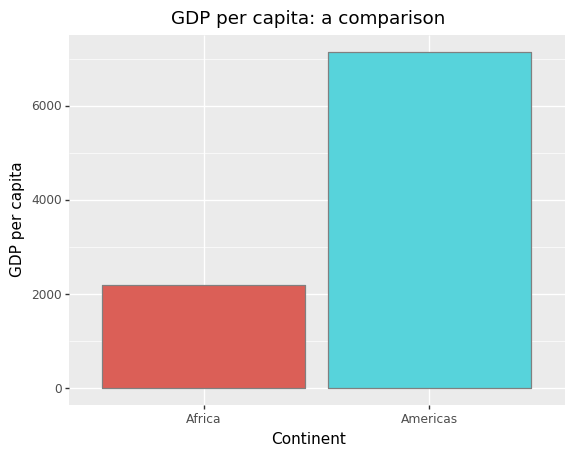

<ggplot: (-9223372029299258862)>


In [71]:
p=MakeBarPlot(myNewData_meanPerCont)
print(p)

In [73]:
groupBy_2=['continent','country']

#call GetMeansByCategory(df,groupby_list)
myNewData_meanPerCountry=GetMeansByCategory(myNewData,groupBy_2)
myNewData_meanPerCountry.head()

,continent,country,year,lifeExp,pop,gdpPercap
0,Africa,Algeria,1979.5,59.030167,1.987541e+07,4426.025973
1,Africa,Angola,1979.5,37.883500,7.309390e+06,3607.100529
2,Africa,Benin,1979.5,48.779917,4.017497e+06,1155.395107
3,Africa,Botswana,1979.5,54.597500,9.711862e+05,5031.503557
4,Africa,Burkina_Faso,1979.5,44.694000,7.548677e+06,843.990665


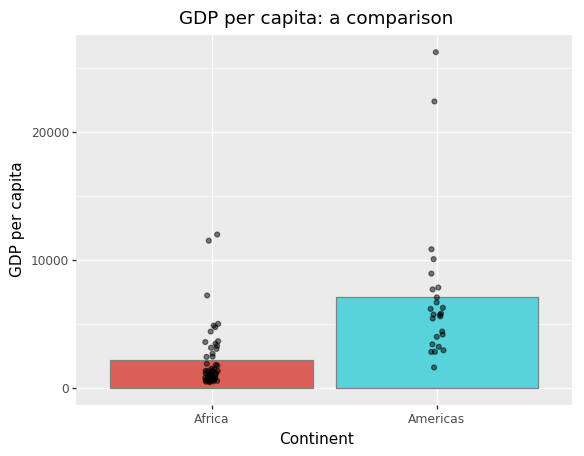

<ggplot: (-9223372029299638661)>


/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 5 x 4 in image.
  from_inches(height, units), units))
/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: GDP_Africa_Americas.png
  warn('Filename: {}'.format(filename))


In [78]:
p1=p+geom_point(myNewData_meanPerCountry,aes(x = 'continent', y = 'gdpPercap'),
               fill='black',
               position=position_jitter(width=0.03),
               alpha=0.5)
print(p1)
p1.save(filename="GDP_Africa_Americas.png", height=4, width=5, units='in')